In [1]:
!pip install pulp
import pulp

# A transportation problem

The objective of the transportations problem is to minimize the total cost of transport for a product that should be delivered in certain known places with known demand from storage centers with known offer capacity.

Suppose that our company has three warehouses W1, W2, and W3 in this area. Every warehouse has the capacity to store O1, O2 and O3 units of the product (offer). The sum of these capacities is the same as the total demand expected in this area, according to the supply contracts established with the local stores. The company must supply the orders (demand) of this product for three different stores, S1, S2, and S3. Every store asks for D1, D2, and D3 units.

Additionally, we calculated the cost of delivering every unit from warehouse i to store j as Cij. We know the cost from, for example, a preliminary study based on the distance between the buildings, the weight of the products, and the price of gas.

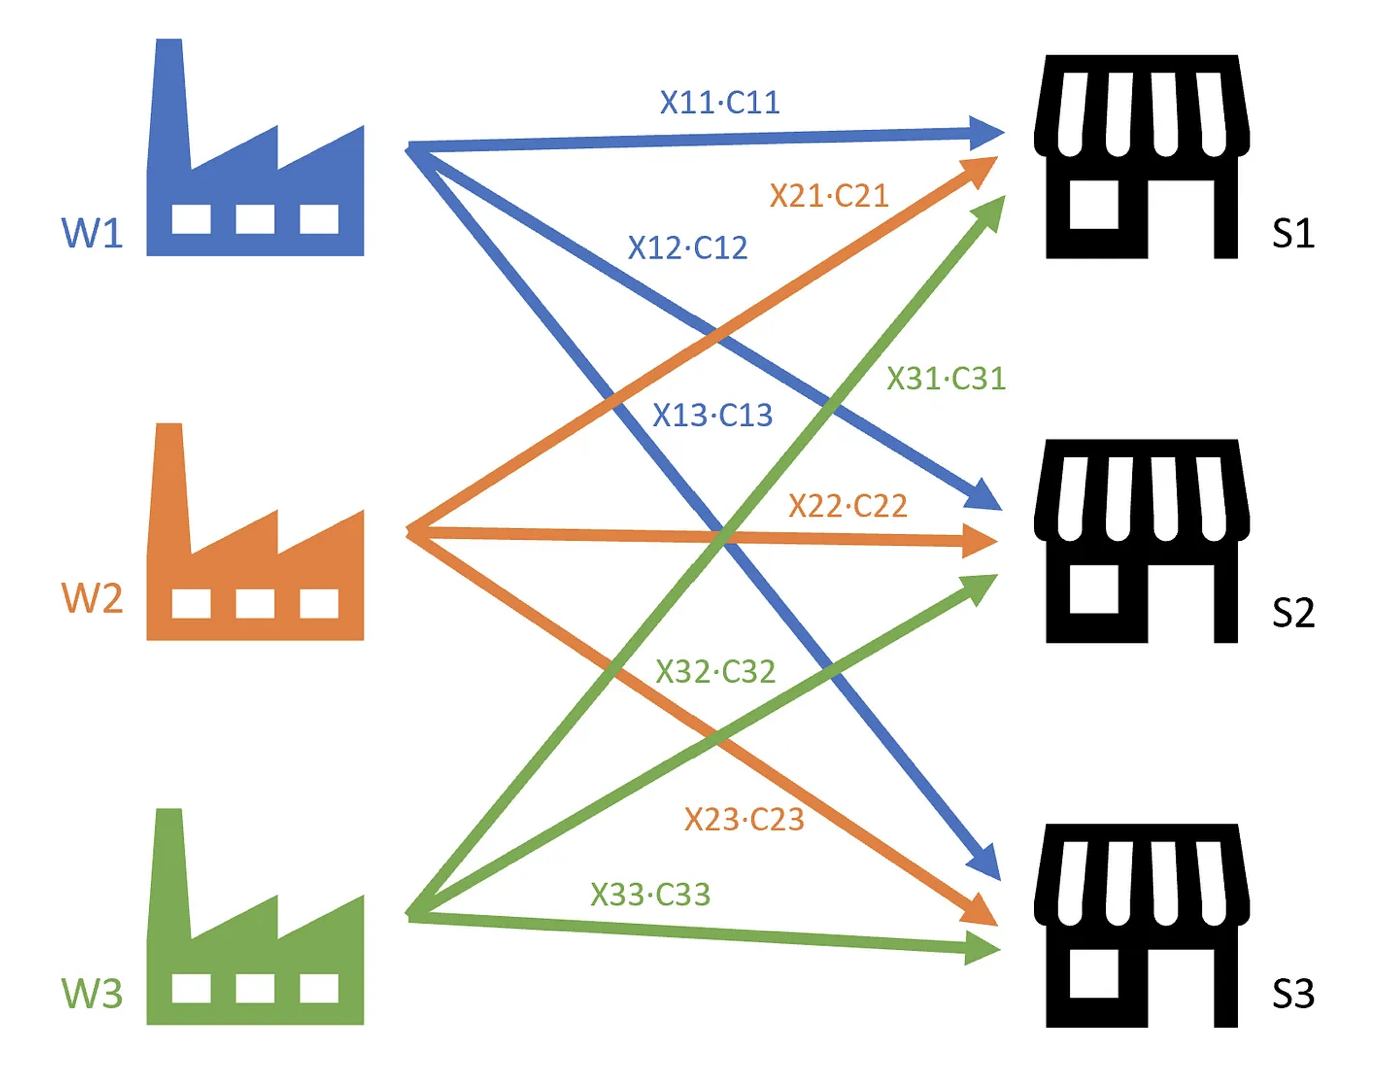

# 0 Data

In [2]:
# Costs
C11 = 0.7
C12 = 0.5
C13 = 0.8
C21 = 1.4
C22 = 1.3
C23 = 0.7
C31 = 0.7
C32 = 1.2
C33 = 1.0

# Offers
O1 = 2531
O2 = 1052
O3 = 854

# Demands
D1 = 1000
D2 = 2400
D3 = 1037

# 1 Initialize problem

In [3]:
prob = pulp.LpProblem("TransportProblem", pulp.LpMinimize)

# 2 Declare decision variables

In [4]:
# x_ij: number of units delivered from warehouse i to store j
x11 = pulp.LpVariable("x11", lowBound = 0, cat='Integer')
x12 = pulp.LpVariable("x12", lowBound = 0, cat='Integer')
x13 = pulp.LpVariable("x13", lowBound = 0, cat='Integer')
x21 = pulp.LpVariable("x21", lowBound = 0, cat='Integer')
x22 = pulp.LpVariable("x22", lowBound = 0, cat='Integer')
x23 = pulp.LpVariable("x23", lowBound = 0, cat='Integer')
x31 = pulp.LpVariable("x31", lowBound = 0, cat='Integer')
x32 = pulp.LpVariable("x32", lowBound = 0, cat='Integer')
x33 = pulp.LpVariable("x33", lowBound = 0, cat='Integer')

# 3 Define objective function

In [5]:
prob += x11*C11 + x12*C12 + x13*C13 + x21*C21 + x22*C22 + x23*C23 + x31*C31 + x32*C32 + x33*C33

# 4 Define constraints

In [6]:
prob += x11 + x12 + x13 == O1
prob += x21 + x22 + x23 == O2
prob += x31 + x32 + x33 == O3
prob += x11 + x21 + x31 == D1
prob += x12 + x22 + x32 == D2
prob += x13 + x23 + x33 == D3

# 5 Solve the problem

In [7]:
prob.solve()

if prob.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}' )
    print(f'Optimal value for x11 = {x11.varValue}')
    print(f'Optimal value for x12 = {x12.varValue}')
    print(f'Optimal value for x13 = {x13.varValue}')
    
    print(f'Optimal value for x21 = {x21.varValue}')
    print(f'Optimal value for x22 = {x22.varValue}')
    print(f'Optimal value for x23 = {x23.varValue}')
    
    print(f'Optimal value for x31 = {x31.varValue}')
    print(f'Optimal value for x32 = {x32.varValue}')
    print(f'Optimal value for x33 = {x33.varValue}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/schaefer/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/25b5c7bb5add4af79bf386b37272cebd-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/25b5c7bb5add4af79bf386b37272cebd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 57 RHS
At line 64 BOUNDS
At line 74 ENDATA
Problem MODEL has 6 rows, 9 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2636.4 - 0.00 seconds
Cgl0004I processed model has 5 rows, 8 columns (8 integer (0 of which binary)) and 16 elements
Cutoff increment increased from 1e-05 to 0.0999
Cbc0012I Integer solution of 2636.4 found by DiveCoefficient after 0 iterations and 0 nodes (0.02 seconds)
Cbc0001I Search c